# Title
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [4]:
# Import libraries
import sklearn
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
from IPython.display import HTML
from IPython.display import display

In [ ]:
from 

In [6]:
%matplotlib inline

In [7]:
import seaborn as sns
sns.set()
r_seed = 37

## Load dataset

In [8]:
f_database = r'../../data/processed/microscopic_imgs/cropped_clean/db'
Print_Database= pd.read_csv(f_database+"/"+'Print_Database_ML.csv',index_col=[0])

df_raw_input = pd.read_csv(f_database+"/"+'JS_A191_dataset_2023_4_4.tsv',index_col=None, delimiter='\t')

In [9]:
df_raw_input.drop('Unnamed: 26', axis=1, inplace=True)

In [10]:
df_raw_input.rename(columns={'Date Completed / Initials':'initials',  '  Print ID #': 'print_id', 'Printhead ID #': 'print_head_id',
                            'Line Width (um)': 'line_width', 'Substrate Thickness (um)': 'substrate_thickness',
                            'Cartridge Print Height': 'cartridge_print_height', 'Nozzle Voltage': 'nozzle_voltage',
       'Drop Spacing (um)': 'drop_spacing', 'Nozzle #': 'nozzle_id', 'Jetting Frequency (kHz)': 'jetting_freq',
       'Distance  (um)': 'distance',
       'Time (us)': 'time', 'Velocity (m/s) ':'velocity', 'Notes': 'notes', 'Platen  Temperature' : 'platen_temperature',
       'Cartridge Temperature': 'cartridge_temperature', 'Waveform File': 'waveform_file', 'Number of Layers': 'no_of_layers',
       'Ink  Viscosity (cP) (η)': 'ink_visco_cp', 'Ink  Viscosity (Pa*s) (η)': 'ink_visco_pas',
       'Surface  Tension (dyne/cm) (γ)': 'surface_tension_dyne_cm', 'Surface Tension (N/m) (γ)': 'surface_tension_n_m',
       'Ink  Density (ρ=g/L)': 'ink _density', 'Nozzle  Diameter (um)': 'nozzle_diameter', 'Particle size (nm)' : 'particle_size',
       'z-Number  ( √γρD/ η )': 'z_number', 'Line Width': 'line_width', 'Roughness': 'roughness', 'Overspray': 'overspray',
       'Thickness': 'thickness', 'conductivity': 'conductivity'}, inplace=True)

Print_Database.rename(columns={'Print ID': 'print_id', 
                               'Print Height': 'print_height', 'Nozzle Voltage': 'nozzle_voltage', 
                               'Drop Spacing': 'drop_spacing', 'Line Width': 'line_width', 
                               'Overspray':'overspray', 'Roughness': 'roughness'}, inplace=True)

df_raw_input.drop(['line_width', 'roughness', 'overspray', 'thickness', 'conductivity'], axis=1, inplace=True)

In [11]:
df_all_features_print = pd.merge(Print_Database, df_raw_input, on='print_id',how='left')

In [12]:
list_opt_features = ['line_width', 'roughness', 'overspray', 'thickness', 'conductivity']
# 'nozzle_diameter' all has same value of 21.5, 
# 'jetting_freq' all has same value of 5
# 'substrate_thickness' all has same value of 200
# no_of_layers 1
# particle_size 36
list_id_features = ['print_id', 'print_head_id', 'nozzle_id','notes', 'initials', 
                    'waveform_file', 'nozzle_diameter', 'jetting_freq', 'substrate_thickness',
                    'no_of_layers', 'particle_size'] 
list_corelated_features = ['z_number',  'ink_visco_pas', 'surface_tension_n_m', 'nozzle_voltage', 'drop_spacing', 'print_height']

list_inp_features  = list(set(df_all_features_print.columns) - set(list_id_features+list_opt_features+list_corelated_features))

[list_opt_features.remove(x) for x in ['thickness', 'conductivity']]

[list_inp_features.remove(x) for x in ['platen_temperature', 'cartridge_temperature']]

[None, None]

# Existing Methods [MLPRegressor]

## EDA

In [13]:
df_all_features_print.replace('-', np.NaN, inplace=True)
df_all_features_print.replace([np.inf, -np.inf], np.NaN, inplace=True)

In [14]:
df_all_features_print[list_inp_features].isna().sum()

nozzle_voltage_x           0
distance                   0
ink_visco_cp               0
ink _density               0
velocity                   0
drop_spacing_x             0
surface_tension_dyne_cm    0
drop_spacing_y             0
time                       0
cartridge_print_height     0
nozzle_voltage_y           0
dtype: int64

In [15]:
# https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/ 
df_all_features_print[list_inp_features].describe()

,nozzle_voltage_x,distance,ink_visco_cp,ink _density,velocity,drop_spacing_x,surface_tension_dyne_cm,drop_spacing_y,time,cartridge_print_height,nozzle_voltage_y
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,32.037915,754.691943,6.754976,1590.554502,10.632852,12.407583,31.961611,12.407583,71.094787,735.781991,32.037915
std,5.044420,258.001984,0.257481,41.626121,2.644563,2.902337,0.600789,2.902337,23.715788,51.053006,5.044420
min,25.000000,270.000000,6.300000,1517.000000,6.667000,8.000000,30.900000,8.000000,31.000000,650.000000,25.000000
25%,28.000000,900.000000,6.900000,1614.000000,8.333333,10.000000,32.300000,10.000000,58.500000,700.000000,28.000000
50%,31.000000,900.000000,6.900000,1614.000000,10.345000,12.000000,32.300000,12.000000,69.000000,750.000000,31.000000
75%,37.000000,900.000000,6.900000,1614.000000,13.043000,15.000000,32.300000,15.000000,87.000000,800.000000,37.000000
max,40.000000,900.000000,6.900000,1614.000000,15.517241,17.000000,32.300000,17.000000,130.000000,800.000000,40.000000


/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


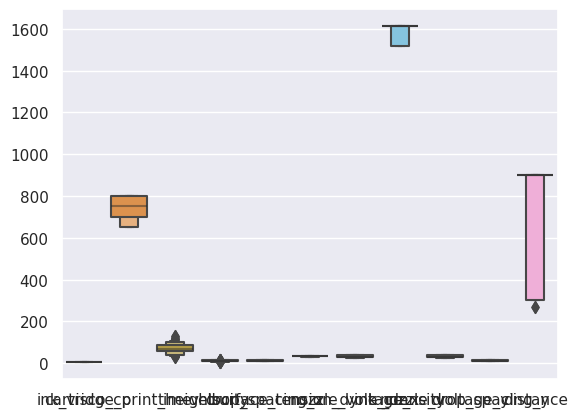

In [13]:
sns.boxenplot(df_all_features_print[list_inp_features])
plt.show()

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


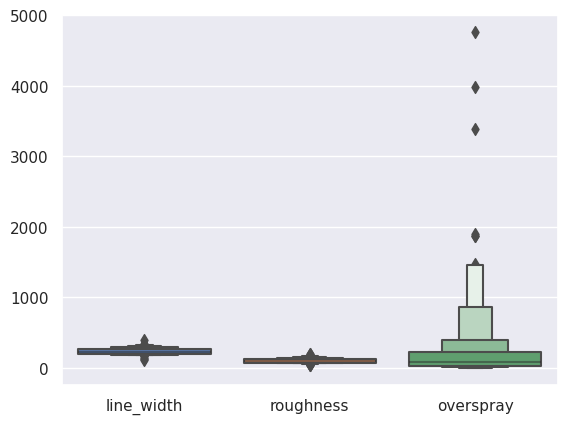

In [14]:
#plt.boxplot(Print_Database['Line Width','Overspray','Roughness'],widths=(0.2))
# Print_Database.boxplot(column=['Line Width','Overspray','Roughness'],widths=(0.5))
# plt.show()

sns.boxenplot(df_all_features_print[list_opt_features])
plt.show()

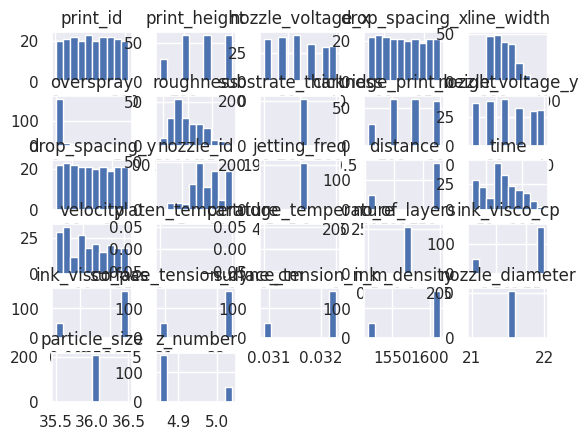

In [15]:
df_all_features_print.hist()

plt.hist(df_all_features_print['line_width'])
plt.title('Line Width Histogram')
plt.show()

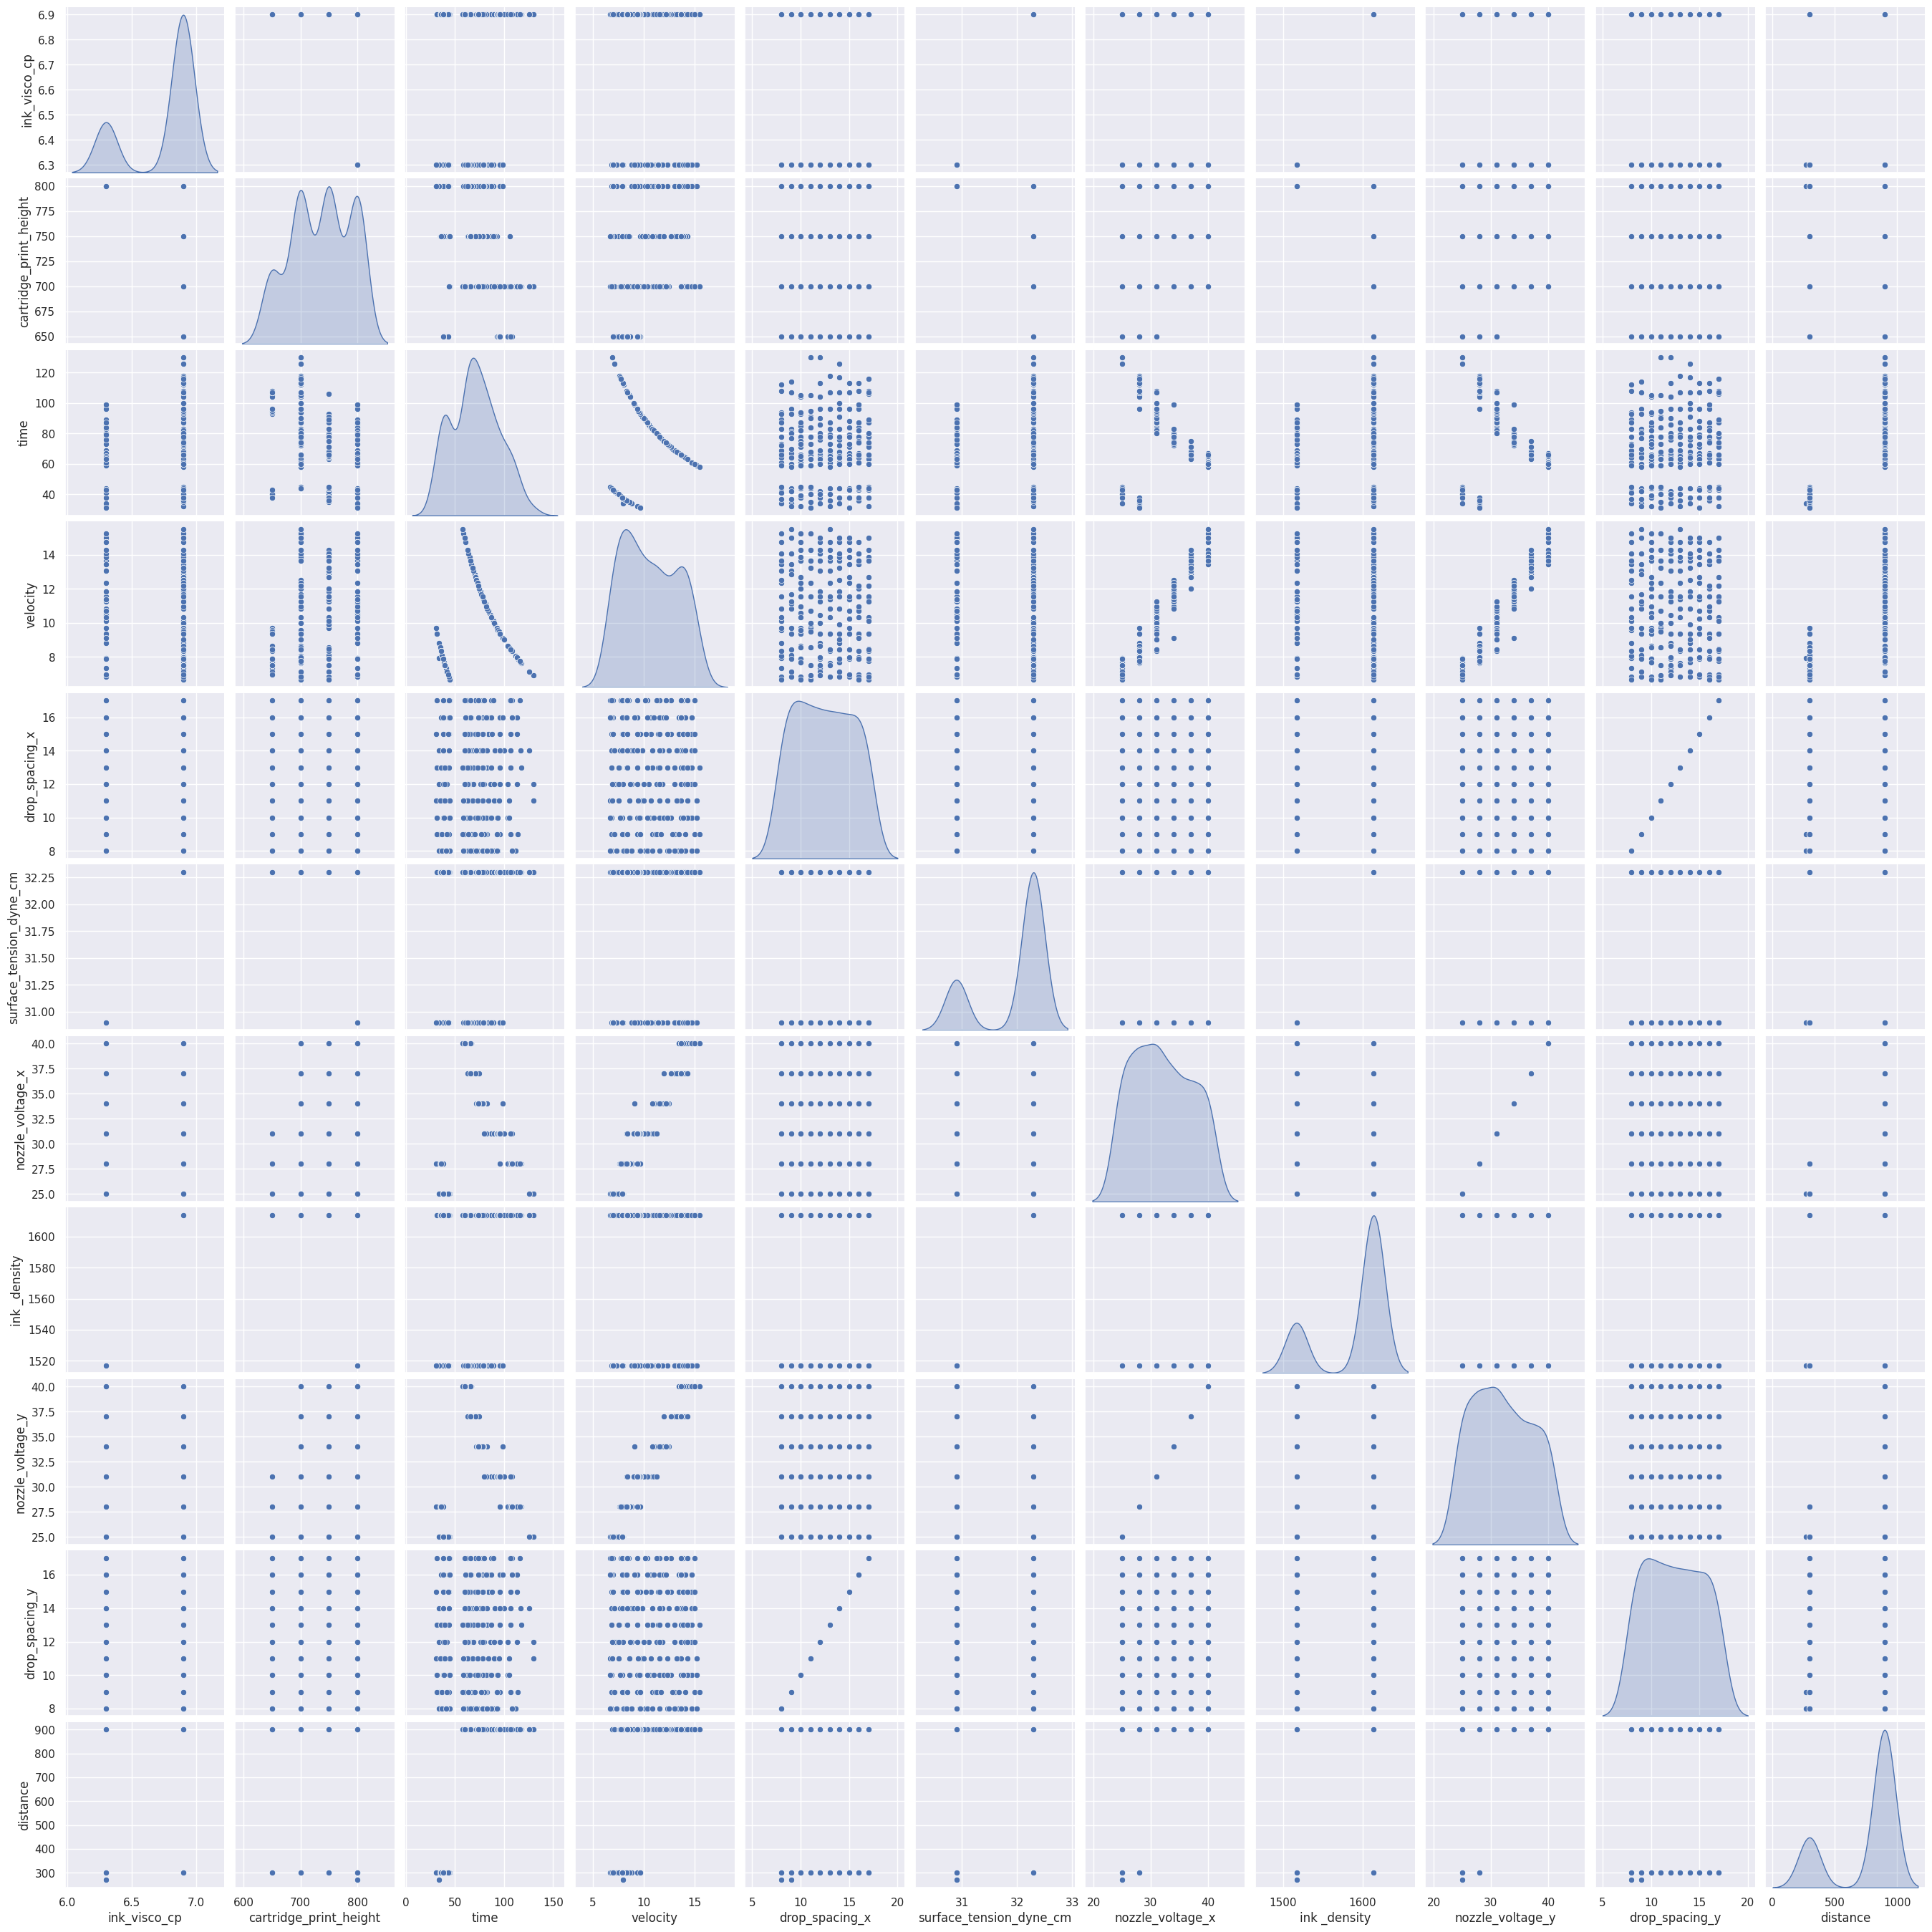

In [16]:
sns.pairplot(df_all_features_print[list_inp_features], diag_kind='kde');

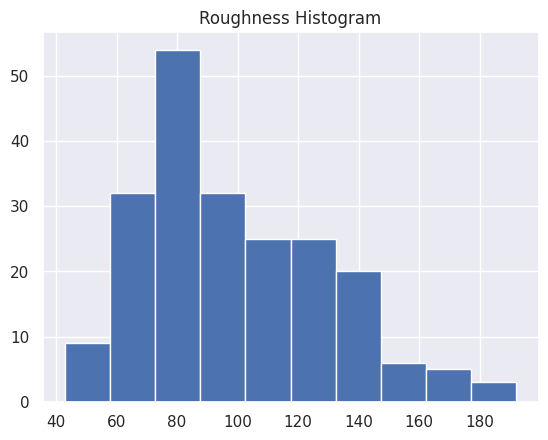

In [17]:
plt.hist(df_all_features_print['roughness'])
plt.title('Roughness Histogram')
plt.show()

In [18]:
df_high_Overspray = df_all_features_print[df_all_features_print['overspray'] > 500]

(array([9., 5., 2., 3., 0., 0., 1., 0., 1., 1.]),
 array([ 523. ,  946.9, 1370.8, 1794.7, 2218.6, 2642.5, 3066.4, 3490.3,
        3914.2, 4338.1, 4762. ]),
 <BarContainer object of 10 artists>)

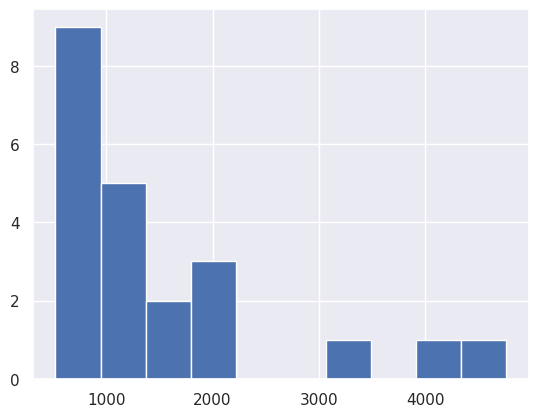

In [19]:
plt.hist(df_high_Overspray['overspray'])

In [16]:
df_all_features_print_modified_overspray = df_all_features_print.drop(df_all_features_print.index[df_all_features_print['overspray'] >450])
df_all_features_print_modified_overspray

,print_id,print_height,nozzle_voltage_x,drop_spacing_x,line_width,overspray,roughness,initials,print_head_id,substrate_thickness,...,waveform_file,no_of_layers,ink_visco_cp,ink_visco_pas,surface_tension_dyne_cm,surface_tension_n_m,ink _density,nozzle_diameter,particle_size,z_number
0,1,800,25,8,294,12,164,02.22.22/ J.K,281744.0025.4621.01,200,...,samba waveform_Fataneh,1,6.3,0.0063,30.9,0.0309,1517,21.5,36,5.039074
1,2,800,25,9,261,136,141,02.22.22/ J.K,281744.0025.4621.01,200,...,samba waveform_Fataneh,1,6.3,0.0063,30.9,0.0309,1517,21.5,36,5.039074
2,3,800,25,10,218,11,103,02.23.22/ A.T,281744.0025.4621.01,200,...,samba waveform_Fataneh,1,6.3,0.0063,30.9,0.0309,1517,21.5,36,5.039074
3,4,800,25,11,190,15,68,02.23.22/ C.F,281744.0025.4621.01,200,...,samba waveform_Fataneh,1,6.3,0.0063,30.9,0.0309,1517,21.5,36,5.039074
4,5,800,25,12,190,91,90,02.23.22/ C.F,281744.0025.4621.01,200,...,samba waveform_Fataneh,1,6.3,0.0063,30.9,0.0309,1517,21.5,36,5.039074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,205,650,31,12,262,17,94,05.31.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.9,0.0069,32.3,0.0323,1614,21.5,36,4.852027
207,206,650,31,13,241,15,86,05.31.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.9,0.0069,32.3,0.0323,1614,21.5,36,4.852027
208,207,650,31,14,191,77,87,05.31.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.9,0.0069,32.3,0.0323,1614,21.5,36,4.852027
209,209,650,31,16,188,1,73,06.02.22 / C.F,281744.0021.4621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.9,0.0069,32.3,0.0323,1614,21.5,36,4.852027


(array([75., 34., 21., 10.,  9., 14.,  9.,  6.,  5.,  5.]),
 array([  0. ,  41.5,  83. , 124.5, 166. , 207.5, 249. , 290.5, 332. ,
        373.5, 415. ]),
 <BarContainer object of 10 artists>)

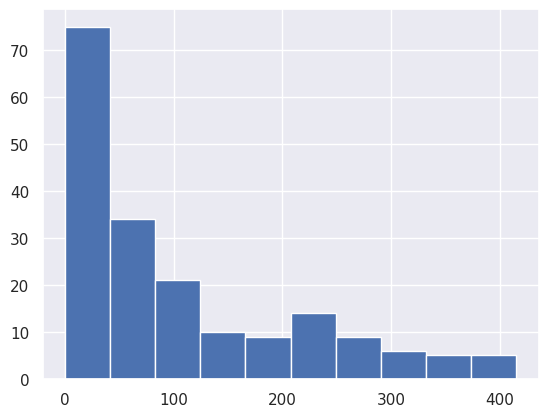

In [21]:
plt.hist(df_all_features_print_modified_overspray['overspray'])

## Normalization and Train Test Split

df_all_features_print[list_inp_features].info()
np.any(np.isfinite(df_all_features_print[list_opt_features]))
df_all_features_print[list_inp_features] = np.nan_to_num(df_all_features_print[list_inp_features])

In [22]:
# df_all_features_print = df_all_features_print.reset_index()

In [23]:
# Set features, targets
from sklearn.model_selection import train_test_split
features = df_all_features_print[list_inp_features]
target = df_all_features_print[list_opt_features]

# set test and train 
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.2 ,random_state=42)

# Feature normalization 
# Here we normalized in a way that all features have the mean zero and standard deviation one 
x_train_std = x_train.std()
x_train_mean = x_train.mean()

x_train_normalized = pd.DataFrame()
for column in range (0,len(x_train.columns)): 
    x_train_normalized[x_train.columns[column]] = (x_train.iloc[:,column]-x_train_mean[column])/x_train_std[column]

    
x_test_normalized = pd.DataFrame()
for column in range (0,len(x_test.columns)): 
    x_test_normalized[x_test.columns[column]] = (x_test.iloc[:,column]-x_train_mean[column])/x_train_std[column]



## ML Algos

### Line width

 This problem is unconstrained.
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          391     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.79467D+04    |proj g|=  2.32306D+02

At iterate    1    f=  2.68247D+03    |proj g|=  3.31415D+02

At iterate    2    f=  1.96062D+03    |proj g|=  3.19521D+02

At iterate    3    f=  6.71430D+02    |proj g|=  8.18417D+01

At iterate    4    f=  6.07029D+02    |proj g|=  5.96902D+01

At iterate    5    f=  5.23163D+02    |proj g|=  3.31259D+01

At iterate    6    f=  4.53052D+02    |proj g|=  2.93956D+01

At iterate    7    f=  4.01267D+02    |proj g|=  2.96369D+01

At iterate    8    f=  3.76940D+02    |proj g|=  2.34381D+01

At iterate    9    f=  3.65824D+02    |proj g|=  1.90522D+01

At iterate   10    f=  3.31456D+02    |proj g|=  2.11016D+01

At iterate   11    f=  3.16685D+02    |proj g|=  1.13453D+01

At iterate   12    f=  3.04021D+02    |proj g|=  7.51605D+00

At iterate   13    f=  2.9

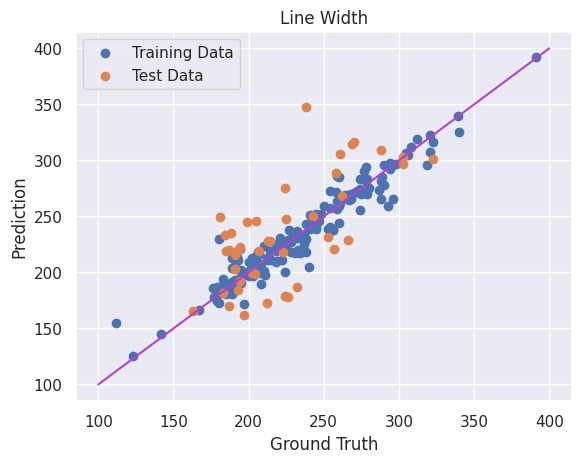

In [24]:
# Here we define ML model

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math 

mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=42)

mlp_reg.fit(x_train_normalized, y_train['line_width'])

y_pred_train = mlp_reg.predict(x_train_normalized)
plt.scatter(y_train['line_width'], y_pred_train, label='Training Data')
R2_train = r2_score(y_train['line_width'],y_pred_train)
print('R2_train =', R2_train)
RSME_train = math.sqrt(mean_squared_error(y_train['line_width'],y_pred_train))
print('RSME_train = ',RSME_train)

y_pred_test = mlp_reg.predict(x_test_normalized)
plt.scatter(y_test['line_width'], y_pred_test,label='Test Data')
R2_test = r2_score(y_test['line_width'],y_pred_test)
print('R2_test =', R2_test)
RSME_test = math.sqrt(mean_squared_error(y_test['line_width'],y_pred_test))
print('RSME_test = ',RSME_test)

x = [100,400]
y = [100,400]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Line Width')
plt.legend()
plt.show()

In [ ]:
R2_train = 0.7631930794208385
RSME_train =  21.44942675039149
R2_test = 0.6359015508438468
RSME_test =  24.502041581763386

### Roughness

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          391     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53321D+03    |proj g|=  1.00550D+02

At iterate    1    f=  8.00159D+02    |proj g|=  9.32935D+01

At iterate    2    f=  5.76833D+02    |proj g|=  8.12473D+01

At iterate    3    f=  3.91936D+02    |proj g|=  2.73895D+01

At iterate    4    f=  3.73387D+02    |proj g|=  2.81857D+01

At iterate    5    f=  3.36035D+02    |proj g|=  1.49854D+01

At iterate    6    f=  3.16334D+02    |proj g|=  9.88023D+00

At iterate    7    f=  3.11335D+02    |proj g|=  1.65952D+01

At iterate    8    f=  3.00839D+02    |proj g|=  5.07667D+00

At iterate    9    f=  2.98115D+02    |proj g|=  5.40154D+00

At iterate   10    f=  2.93185D+02    |proj g|=  7.53867D+00

At iterate   11    f=  2.88060D+02    |proj g|=  6.21547D+00

At iterate   12    f=  2.82880D+02    |proj g|=  5.08324D+00

At iterate   13    f=  2.7

 This problem is unconstrained.



At iterate  463    f=  5.29136D+01    |proj g|=  3.60639D+00

At iterate  464    f=  5.28446D+01    |proj g|=  3.72175D+00

At iterate  465    f=  5.27556D+01    |proj g|=  3.39756D+00

At iterate  466    f=  5.26716D+01    |proj g|=  3.94085D+00

At iterate  467    f=  5.25917D+01    |proj g|=  3.89742D+00

At iterate  468    f=  5.25370D+01    |proj g|=  4.12566D+00

At iterate  469    f=  5.24324D+01    |proj g|=  3.01303D+00

At iterate  470    f=  5.23524D+01    |proj g|=  4.12455D+00

At iterate  471    f=  5.23288D+01    |proj g|=  3.86704D+00

At iterate  472    f=  5.21785D+01    |proj g|=  2.91536D+00

At iterate  473    f=  5.20348D+01    |proj g|=  3.86802D+00

At iterate  474    f=  5.19226D+01    |proj g|=  3.29039D+00

At iterate  475    f=  5.18296D+01    |proj g|=  3.34808D+00

At iterate  476    f=  5.17397D+01    |proj g|=  3.21000D+00

At iterate  477    f=  5.16422D+01    |proj g|=  3.74195D+00

At iterate  478    f=  5.15813D+01    |proj g|=  3.67022D+00

At iter

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


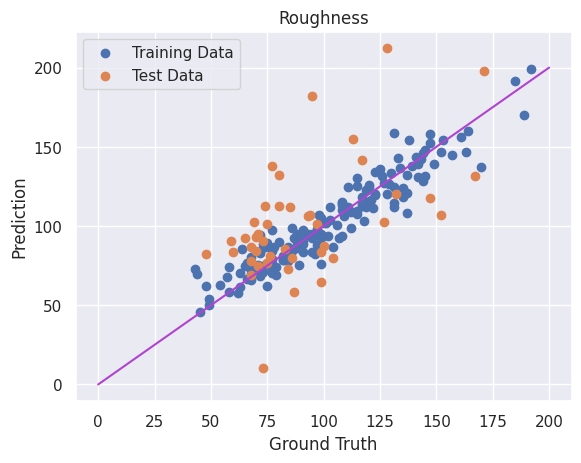

In [25]:
mlp_reg.fit(x_train_normalized, y_train['roughness'])

y_pred_train = mlp_reg.predict(x_train_normalized)
plt.scatter(y_train['roughness'], y_pred_train,label='Training Data')
R2_train = r2_score(y_train['roughness'],y_pred_train)
print('R2_train =', R2_train)
RSME_train = math.sqrt(mean_squared_error(y_train['roughness'],y_pred_train))
print('RSME_train = ',RSME_train)


y_pred_test = mlp_reg.predict(x_test_normalized)
plt.scatter(y_test['roughness'], y_pred_test, label='Test Data')
R2_test = r2_score(y_test['roughness'],y_pred_test)
print('R2_test =', R2_test)
RSME_test = math.sqrt(mean_squared_error(y_test['roughness'],y_pred_test))
print('RSME_test = ',RSME_test)

x = [0,200]
y = [0,200]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Roughness')
plt.legend()
plt.show()

### Overspray Outlier treatment and normalization

In [26]:
df_all_features_print_os_o = df_all_features_print.drop(df_all_features_print.index[df_all_features_print['overspray'] >450])

# Set features, target
from sklearn.model_selection import train_test_split
features = df_all_features_print_os_o[list_inp_features]
target = df_all_features_print_os_o[list_opt_features]

# set test and train
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(features,target, test_size=0.2 ,random_state=r_seed)

# Normalization 
x_train_os_std = x_train_os.std()
x_train_os_mean = x_train_os.mean()
x_train_os_normalized = pd.DataFrame()
for column in range (0,len(x_train_os.columns)): # This section reads each column of the input file and calculates the RMS
    x_train_os_normalized[x_train_os.columns[column]] = (x_train_os.iloc[:,column]-x_train_os_mean[column])/x_train_os_std[column]

    

x_test_os_normalized = pd.DataFrame()
for column in range (0,len(x_test_os.columns)): # This section reads each column of the input file and calculates the RMS
    x_test_os_normalized[x_test_os.columns[column]] = (x_test_os.iloc[:,column]-x_train_os_mean[column])/x_train_os_std[column]

  

In [27]:
print(len(df_all_features_print), len(df_all_features_print_os_o))
print(len(x_train_os), len(x_test_os))

211 188
150 38


### Overspray Predict

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          391     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08079D+04    |proj g|=  9.94811D+01

At iterate    1    f=  5.36893D+03    |proj g|=  6.97086D+01

At iterate    2    f=  5.20601D+03    |proj g|=  6.85108D+01

At iterate    3    f=  4.93087D+03    |proj g|=  5.91782D+01

At iterate    4    f=  4.81540D+03    |proj g|=  3.15804D+01

At iterate    5    f=  4.74839D+03    |proj g|=  3.26941D+01

At iterate    6    f=  4.67470D+03    |proj g|=  3.94262D+01

At iterate    7    f=  4.57770D+03    |proj g|=  3.69520D+01

At iterate    8    f=  4.47715D+03    |proj g|=  2.32441D+01

At iterate    9    f=  4.38490D+03    |proj g|=  1.60886D+01

At iterate   10    f=  4.31702D+03    |proj g|=  1.69047D+01

At iterate   11    f=  4.25172D+03    |proj g|=  1.96472D+01

At iterate   12    f=  4.20944D+03    |proj g|=  1.16079D+01

At iterate   13    f=  4.1

 This problem is unconstrained.
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


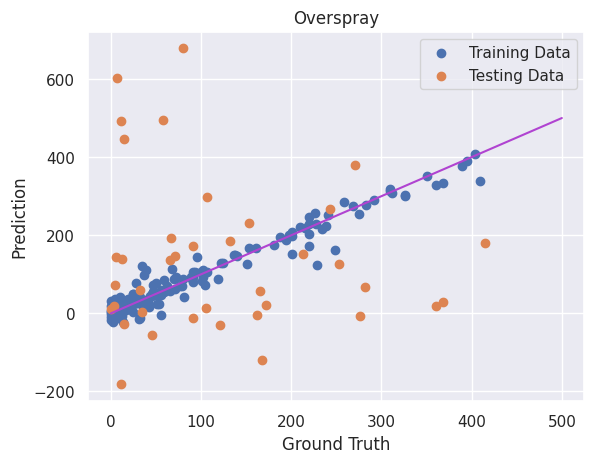

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
# instantiate a neural network 
# lbfgs optimizer used to train the neural network- converges well for small data

'''
mlp_reg = MLPRegressor(activation ='relu',
                        hidden_layer_sizes = (30),
                        alpha = 0.01,
                        learning_rate_init = 0.0001,
                        solver = 'lbfgs',
                        verbose= True,
                        max_iter =500, 
                      random_state=r_seed)
'''
mlp_reg.fit(x_train_os_normalized, y_train_os['overspray'])


y_pred_train_os = mlp_reg.predict(x_train_os_normalized)
plt.scatter(y_train_os['overspray'], y_pred_train_os, label='Training Data')
R2_train_os = r2_score(y_train_os['overspray'],y_pred_train_os)
print('R2_train =', R2_train_os)
RSME_train_os = math.sqrt(mean_squared_error(y_train_os['overspray'],y_pred_train_os))
print('RSME_train = ',RSME_train)


y_pred_test_os = mlp_reg.predict(x_test_os_normalized)
plt.scatter(y_test_os['overspray'], y_pred_test_os, label='Testing Data')
R2_test_os = r2_score(y_test_os['overspray'],y_pred_test_os)
print('R2_test =', R2_test_os)
RSME_test_os = math.sqrt(mean_squared_error(y_test_os['overspray'],y_pred_test_os))
print('RSME_test = ',RSME_test_os)

x = [0,500]
y = [0,500]
plt.plot(x,y, color = '#b043d1')
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.title('Overspray')
plt.legend()
plt.show()

## Local library import
We import all the required local libraries libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import

In [24]:
loc_feature = r'../../data/processed/microscopic_imgs/cropped_clean/db/Print_Database_ML.csv'
df_original= pd.read_csv(loc_feature,index_col=[0])

In [25]:
df_original

,Print ID,Print Height,Nozzle Voltage,Drop Spacing,Line Width,Overspray,Roughness
0,1,800,25,8,294,12,164
1,2,800,25,9,261,136,141
2,3,800,25,10,218,11,103
3,4,800,25,11,190,15,68
4,5,800,25,12,190,91,90
...,...,...,...,...,...,...,...
200,205,650,31,12,262,17,94
201,206,650,31,13,241,15,86
202,207,650,31,14,191,77,87
203,209,650,31,16,188,1,73


In [26]:
df_original.columns

Index(['Print ID', 'Print Height', 'Nozzle Voltage', 'Drop Spacing',
       'Line Width', 'Overspray', 'Roughness'],
      dtype='object')

In [27]:
df_original.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)


x_train_normalized.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)
x_test_normalized.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True), 
y_train.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)
y_test.rename(columns={'Print ID': 'id_print',
                   'Print Height': 'height_print',
                  'Nozzle Voltage': 'voltage_nozzle',
                  'Drop Spacing': 'spacing_drop',
                  'Line Width': 'width_line', 
                   'Overspray': 'overspray',
                   'Roughness':'roughness'}, inplace=True)

In [28]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id_print        205 non-null    int64
 1   height_print    205 non-null    int64
 2   voltage_nozzle  205 non-null    int64
 3   spacing_drop    205 non-null    int64
 4   width_line      205 non-null    int64
 5   overspray       205 non-null    int64
 6   roughness       205 non-null    int64
dtypes: int64(7)
memory usage: 12.8 KB


# EDA

<AxesSubplot:>

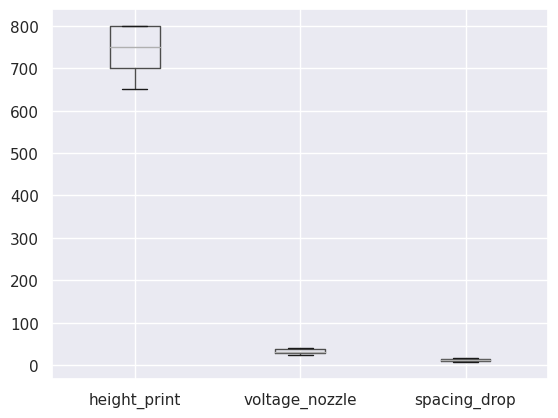

In [29]:
df_original.boxplot(column=['height_print','voltage_nozzle','spacing_drop'])

columns_features =['height_print','voltage_nozzle','spacing_drop']
columns_target = ['width_line', 'overspray', 'roughness']

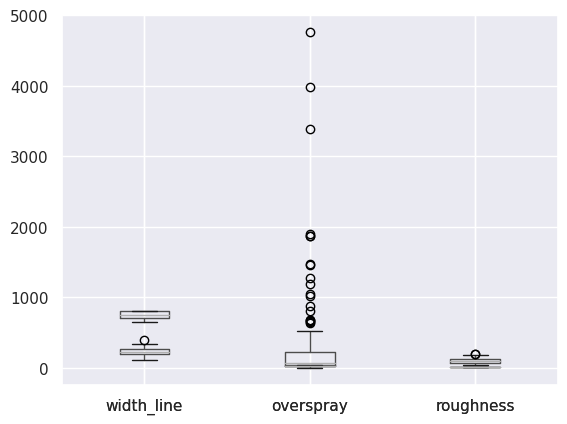

In [31]:
plot_box_df_features = df_original.boxplot(column=columns_features)

plot_box_df_outputs = df_original.boxplot(column=columns_target)

IndexError: index 2 is out of bounds for axis 0 with size 2

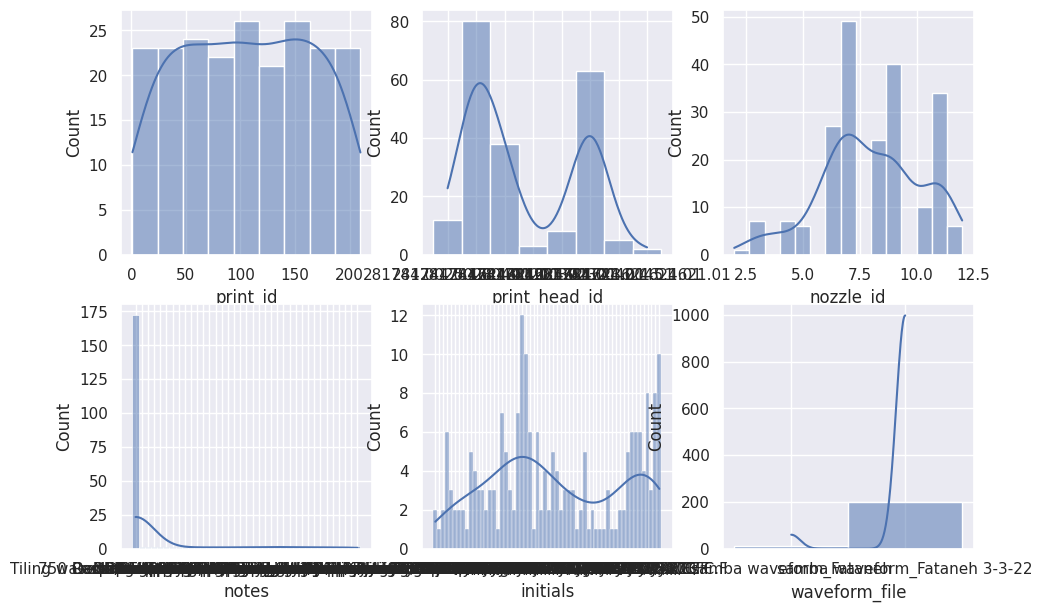

In [54]:
import matplotlib.pyplot as plt
# Define the number of rows and columns you want
n_rows=2
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(11,7))

for i, column in enumerate(list_id_features):
    sns.histplot(df_all_features_print[column],ax=axes[i//n_cols,i%n_cols], kde = True)

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 89.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 91.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


IndexError: index 3 is out of bounds for axis 0 with size 3

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 57.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


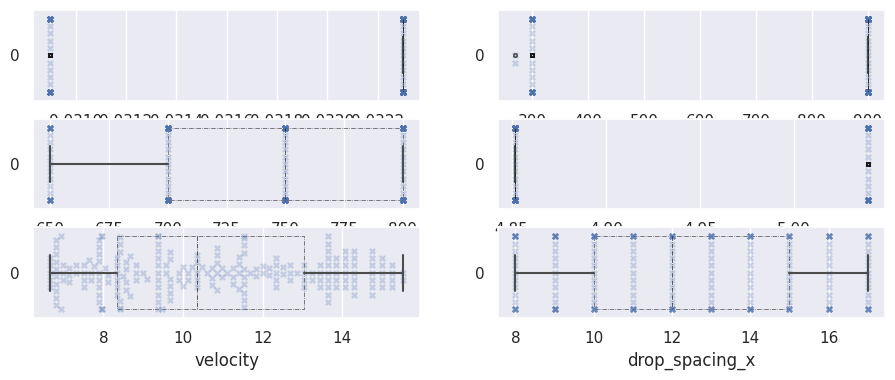

In [53]:
import matplotlib.pyplot as plt
# Define the number of rows and columns you want
n_rows=3
n_cols=2
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(11,4))
flierprops = dict(marker='.', markerfacecolor='none', markersize=5, markeredgecolor='k', alpha = 0.5)
medianprops = dict(linestyle='-.', linewidth=0.5, color='k')
boxprops=dict(linestyle='-.', linewidth=0.5, facecolor='none')#%colorsacecolor':'None', 'linewidth' : 0.5, 'color':'r'}
for i, column in enumerate(list_inp_features+list_opt_features):
    sns.boxplot(df_all_features_print[column],ax=axes[i//n_cols,i%n_cols], orient = 'h', boxprops=boxprops, 
                medianprops= medianprops, zorder=10, flierprops=flierprops)
    sns.swarmplot(df_all_features_print[column],ax=axes[i//n_cols,i%n_cols], orient = 'h', size=5, marker="X",alpha=.25)

## Corelations

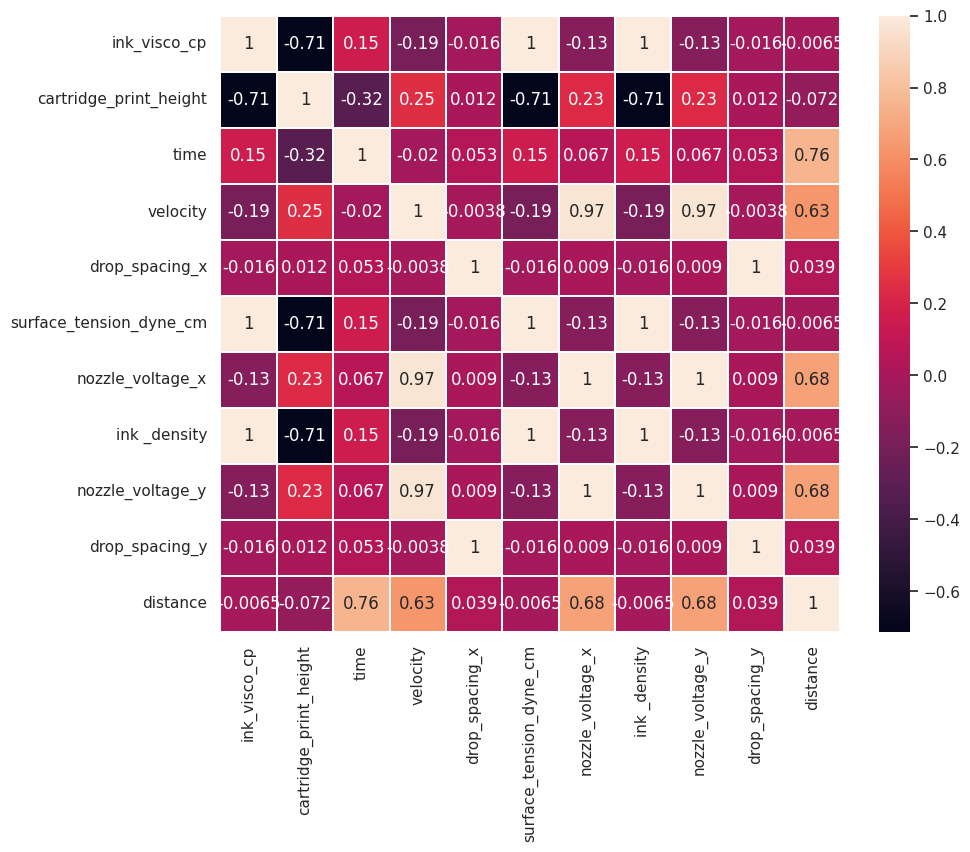

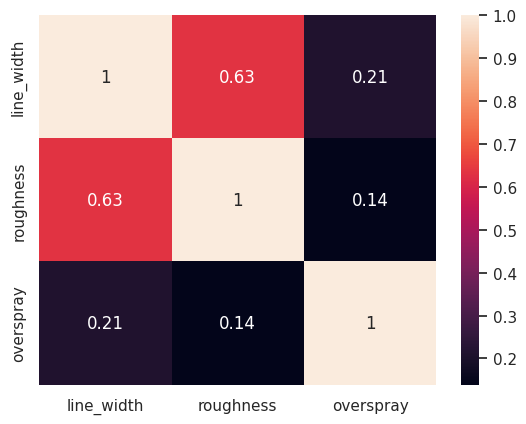

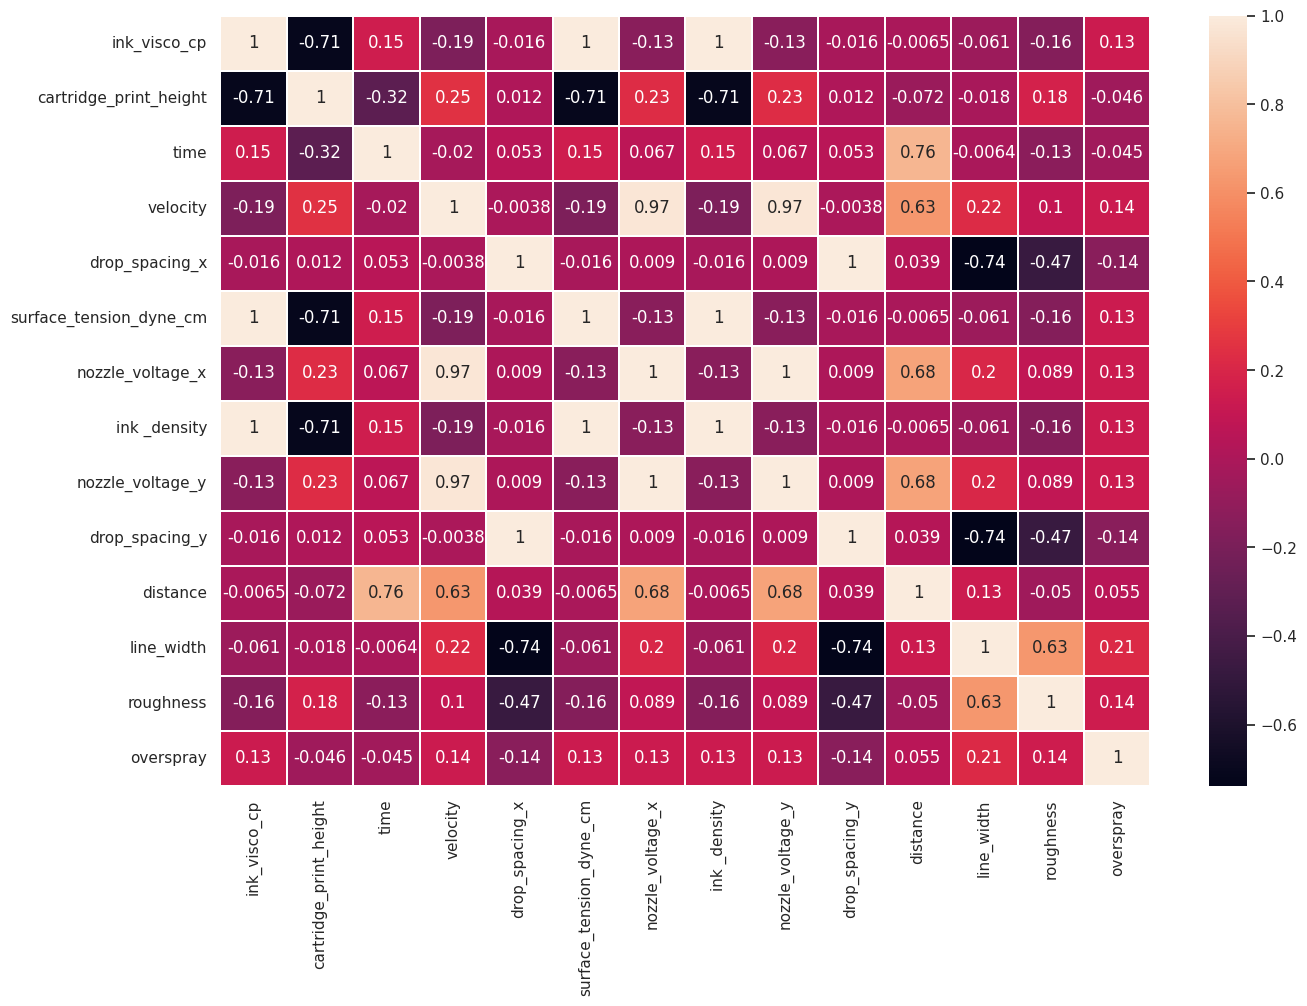

In [30]:
corrMatrix = df_all_features_print[list_inp_features].corr()
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corrMatrix, annot=True, linewidths=.01, ax=ax)
plt.show()

corrMatrix = df_all_features_print[list_opt_features].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df_all_features_print[list_inp_features+list_opt_features].corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corrMatrix, annot=True, linewidths=.01, ax=ax)
plt.show()

In [2]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0
for indx_col,feature_col in enumerate(columns_features):
#     if (indx_col%3 == 0) & (indx_col > 0):
#         row += 1
#         col = 0
    for indx_target, target_col in enumerate(columns_target):
        sns.regplot(x=feature_col,y=target_col,data=df_original,ax=ax[row,col],ci=False)
        col += 1
        if (col%3 == 0) & (col > 0):
            row += 1
            col = 0        
        

NameError: name 'plt' is not defined

# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

## Outlier Treatment

## Normalization, Standerdization

# Prediction Algos

In [36]:
def highlight_rows_rmse(row, asking_value):
    cur_value = row.loc['RMSE']
    if cur_value < asking_value:
        color = '#4808c9'
        font_weight = 'normal'
    elif cur_value == asking_value:
        color = '#BAFFC9' 
        font_weight = 'normal'
    else:
        color = '#222222' 
        font_weight = 'normal'
    return [f'color: {color}; font-weight: {font_weight}' for r in row]

## Line width

R2_train = 0.7631930794208385

RSME_train =  21.44942675039149

R2_test = 0.6359015508438468

RSME_test =  24.502041581763386

`paper` : 23.7

In [37]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train['width_line'], y_test['width_line'])

models.reset_index(drop = False, inplace = True)

100%|██████████| 42/42 [00:02<00:00, 14.27it/s]


In [38]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 24.50),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,BaggingRegressor,0.665906,0.690963,22.573463
1,Lasso,0.624713,0.652860,23.924641
2,PoissonRegressor,0.624413,0.652582,23.934220
3,LGBMRegressor,0.621479,0.649868,24.027500
4,HistGradientBoostingRegressor,0.621479,0.649868,24.027500
5,ElasticNetCV,0.620909,0.649341,24.045590
6,BayesianRidge,0.618056,0.646702,24.135889
7,Ridge,0.616996,0.645722,24.169361
8,RidgeCV,0.616996,0.645722,24.169361
9,LassoCV,0.616296,0.645073,24.191462


## Roughness

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
R2_train = 0.4661703381670843

RSME_train =  22.759895306737544

R2_test = 0.1668281136369445

RSME_test =  25.982118043893102

`paper` :  19.4

In [39]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_normalized, x_test_normalized, y_train['roughness'], y_test['roughness'])
models.reset_index(drop = False, inplace = True)

100%|██████████| 42/42 [00:01<00:00, 38.17it/s]


In [40]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 25.98),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,LGBMRegressor,0.383016,0.429290,21.503797
1,HistGradientBoostingRegressor,0.383016,0.429290,21.503797
2,BaggingRegressor,0.350972,0.399649,22.055136
3,OrthogonalMatchingPursuit,0.318119,0.369260,22.606448
4,HuberRegressor,0.305981,0.358033,22.806766
5,PassiveAggressiveRegressor,0.301496,0.353884,22.880344
6,PoissonRegressor,0.300302,0.352780,22.899885
7,LassoCV,0.277561,0.331744,23.269052
8,LarsCV,0.277512,0.331699,23.269840
9,LassoLarsCV,0.277512,0.331699,23.269840


## Overspray

R2_train = 0.475805274317867

RSME_train =  22.759895306737544

R2_test = -0.3540476835932973

RSME_test =  102.78647489238195

`paper` : 67/129

In [41]:
#import pyforest
from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train_os_normalized, x_test_os_normalized, y_train_os['Overspray'], y_test_os['Overspray'])
models.reset_index(drop = False, inplace = True)

 36%|███▌      | 15/42 [00:00<00:00, 47.00it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


100%|██████████| 42/42 [00:01<00:00, 38.18it/s]


In [42]:
HTML(models[['Model','Adjusted R-Squared', 'R-Squared', 'RMSE']].style.apply(lambda x: highlight_rows_rmse(x, 102.78),axis=1).to_html())

,Model,Adjusted R-Squared,R-Squared,RMSE
0,NuSVR,-0.078923,0.010988,87.845565
1,LGBMRegressor,-0.096644,-0.005257,88.564070
2,HistGradientBoostingRegressor,-0.096644,-0.005257,88.564070
3,TweedieRegressor,-0.105742,-0.013596,88.930662
4,DummyRegressor,-0.110447,-0.017910,89.119686
5,ElasticNetCV,-0.113340,-0.020561,89.235689
6,ElasticNet,-0.118597,-0.025380,89.446107
7,LassoLars,-0.124876,-0.031137,89.696833
8,BayesianRidge,-0.131091,-0.036834,89.944273
9,KNeighborsRegressor,-0.138784,-0.043885,90.249612


# Oversampling

## SMOTE 1K

In [114]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
import ImbalancedLearningRegression as iblr
import smogn

In [120]:
df_all_features_print_normalized_sample_line = smogn.smoter(
    data = df_all_features_print_modified_overspray.iloc[:,:], 
    y = 'line_width',
)

df_all_features_print_normalized_sample_roughness = smogn.smoter(
    data = df_all_features_print_modified_overspray.iloc[:,:], 
    y = 'roughness',
)

df_all_features_print_normalized_sample_overspray = smogn.smoter(
    data = df_all_features_print_modified_overspray.iloc[:,:], 
    y = 'overspray',
)


# Apply the oversampling technique to each target variable separately
# X_resampled_line, y_resampled_line = smote_line.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[0]])
# X_resampled_roughness, y_resampled_roughness = smote_roughness.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[1]])
# X_resampled_spray, y_resampled_spray = smote_spray.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[2]])

# Combine the oversampled datasets for each target variable
# y_resampled = np.hstack((y_resampled_line.values.reshape(-1, 1), y_resampled_roughness.values.reshape(-1, 1), y_resampled_spray.values.reshape(-1, 1)))
# X_resampled = np.vstack((X_resampled_line, X_resampled_roughness, X_resampled_spray))

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/over_sampling.py:128: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, j] = pd.Categorical(pd.factorize(
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/over_sampling.py:128: FutureWarning: In a future version, `df.iloc[:

In [123]:
df_all_features_print_normalized_sample_overspray

,print_id,print_height,nozzle_voltage_x,drop_spacing_x,line_width,overspray,roughness,initials,print_head_id,substrate_thickness,...,waveform_file,no_of_layers,ink_visco_cp,ink_visco_pas,surface_tension_dyne_cm,surface_tension_n_m,ink _density,nozzle_diameter,particle_size,z_number
0,162,699,36,9,302,227,151,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.896373,0.006899,32.308731,0.032298,1613,21.5,36,4.850439
1,161,699,37,8,302,226,151,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.901862,0.006903,32.298710,0.032288,1614,21.5,36,4.852401
2,166,700,36,16,200,227,104,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.902260,0.006903,32.297268,0.032293,1614,21.5,36,4.851453
3,168,700,37,15,199,228,103,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.905566,0.006898,32.309348,0.032303,1613,21.5,36,4.850942
4,153,700,33,8,278,233,100,05.04.22 / A.T,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.898145,0.006897,32.286781,0.032298,1614,21.5,36,4.851894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,199,650,28,16,191,81,99,05.26.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027
178,200,650,28,17,212,282,72,05.26.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027
179,201,650,31,8,323,47,157,05.31.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027
181,203,650,31,10,288,107,85,05.31.22 / C.F,281985.0232.3621.01,200,...,samba waveform_Fataneh 3-3-22,1,6.900000,0.006900,32.300000,0.032300,1614,21.5,36,4.852027


In [59]:
# Set features, target
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = df_all_features_print_modified_overspray[list_inp_features]
target = df_all_features_print_modified_overspray[list_opt_features]

scaler_norm = StandardScaler()
ary_all_features_print_normalized = scaler_norm.fit_transform(df_all_features_print_modified_overspray[list_inp_features+list_opt_features])

df_all_features_print_normalized = pd.DataFrame(ary_all_features_print_normalized, index=df_all_features_print_modified_overspray.index, columns=[list_inp_features+list_opt_features])

In [69]:
df_all_features_print_normalized[list_inp_features+[list_opt_features[0]]]

,nozzle_voltage_x,distance,ink_visco_cp,ink _density,velocity,drop_spacing_x,surface_tension_dyne_cm,drop_spacing_y,time,cartridge_print_height,nozzle_voltage_y,line_width
0,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.541502,-1.707825,-1.541502,-1.508307,1.228252,-1.335952,1.478566
1,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.194848,-1.707825,-1.194848,-1.508307,1.228252,-1.335952,0.723709
2,-1.335952,-1.679511,-1.707825,-1.707825,-0.975453,-0.848195,-1.707825,-0.848195,-1.345854,1.228252,-1.335952,-0.259893
3,-1.335952,-1.679511,-1.707825,-1.707825,-1.384642,-0.501541,-1.707825,-0.501541,-1.102174,1.228252,-1.335952,-0.900377
4,-1.335952,-1.679511,-1.707825,-1.707825,-1.195055,-0.154888,-1.707825,-0.154888,-1.224014,1.228252,-1.335952,-0.900377
...,...,...,...,...,...,...,...,...,...,...,...,...
206,-0.145625,0.593693,0.585540,0.585540,-0.413151,-0.154888,0.585540,-0.154888,1.009714,-1.634286,-0.145625,0.746583
207,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.191766,0.585540,0.191766,1.009714,-1.634286,-0.145625,0.266220
208,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.538419,0.585540,0.538419,1.009714,-1.634286,-0.145625,-0.877503
209,-0.145625,0.593693,0.585540,0.585540,-0.808916,1.231726,0.585540,1.231726,1.497073,-1.634286,-0.145625,-0.946126


In [117]:
df_all_features_print_modified_overspray.reset_index(drop = True, inplace = True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [49]:
smote_line = SMOTE( random_state=42)
smote_roughness = RandomOverSampler(sampling_strategy='minority', random_state=42)
smote_spray = RandomOverSampler(sampling_strategy='minority', random_state=42)

# Apply the oversampling technique to each target variable separately
X_resampled_line, y_resampled_line = smote_line.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[0]])
X_resampled_roughness, y_resampled_roughness = smote_roughness.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[1]])
X_resampled_spray, y_resampled_spray = smote_spray.fit_resample(df_all_features_print_normalized[list_inp_features], df_all_features_print_normalized[list_opt_features[2]])

# Combine the oversampled datasets for each target variable
y_resampled = np.hstack((y_resampled_line.values.reshape(-1, 1), y_resampled_roughness.values.reshape(-1, 1), y_resampled_spray.values.reshape(-1, 1)))
X_resampled = np.vstack((X_resampled_line, X_resampled_roughness, X_resampled_spray))

ValueError: Unknown label type: 'continuous'

In [46]:
df_all_features_print_normalized

,nozzle_voltage_x,distance,ink_visco_cp,ink _density,velocity,drop_spacing_x,surface_tension_dyne_cm,drop_spacing_y,time,cartridge_print_height,nozzle_voltage_y,line_width,roughness,overspray
0,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.541502,-1.707825,-1.541502,-1.508307,1.228252,-1.335952,1.478566,2.149737,-0.845568
1,-1.335952,-1.793171,-1.707825,-1.707825,-0.957976,-1.194848,-1.707825,-1.194848,-1.508307,1.228252,-1.335952,0.723709,1.400163,0.283858
2,-1.335952,-1.679511,-1.707825,-1.707825,-0.975453,-0.848195,-1.707825,-0.848195,-1.345854,1.228252,-1.335952,-0.259893,0.161737,-0.854676
3,-1.335952,-1.679511,-1.707825,-1.707825,-1.384642,-0.501541,-1.707825,-0.501541,-1.102174,1.228252,-1.335952,-0.900377,-0.978918,-0.818243
4,-1.335952,-1.679511,-1.707825,-1.707825,-1.195055,-0.154888,-1.707825,-0.154888,-1.224014,1.228252,-1.335952,-0.900377,-0.261935,-0.126014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,-0.145625,0.593693,0.585540,0.585540,-0.413151,-0.154888,0.585540,-0.154888,1.009714,-1.634286,-0.145625,0.746583,-0.131574,-0.800026
207,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.191766,0.585540,0.191766,1.009714,-1.634286,-0.145625,0.266220,-0.392295,-0.818243
208,-0.145625,0.593693,0.585540,0.585540,-0.413151,0.538419,0.585540,0.538419,1.009714,-1.634286,-0.145625,-0.877503,-0.359705,-0.253530
209,-0.145625,0.593693,0.585540,0.585540,-0.808916,1.231726,0.585540,1.231726,1.497073,-1.634286,-0.145625,-0.946126,-0.815967,-0.945759


In [ ]:

# set test and train
x_train_norm_os, x_test_norm_os, y_train_norm_os, y_test_norm_os = train_test_split(
    df_all_features_print_modified_overspray[list_inp_features],
    df_all_features_print_modified_overspray[list_opt_features], 
    test_size=0.2 ,random_state=42
    )

#  Interpretation

## PDP

### Generalized additive models
- https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html

In [51]:
from pygam import LinearGAM, LogisticGAM

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

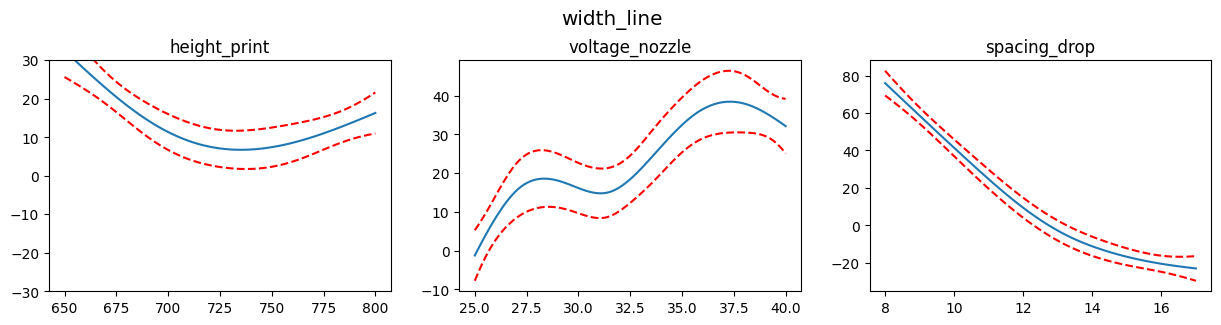

In [80]:
target_to_analyze = 'width_line'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

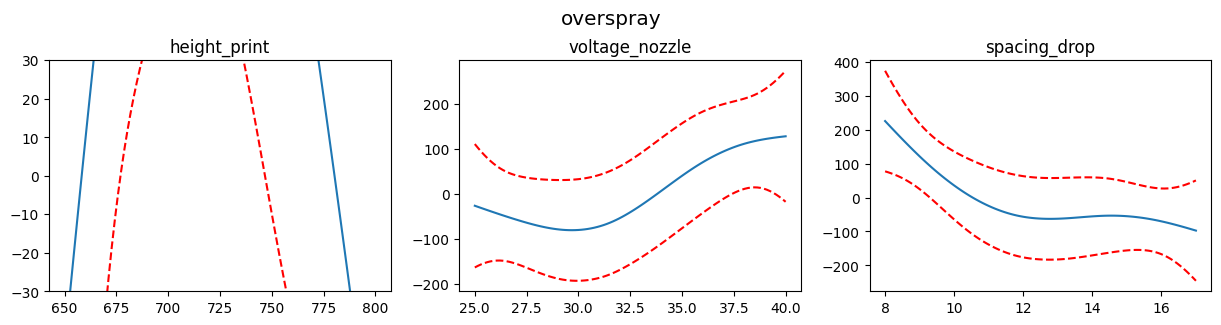

In [81]:
target_to_analyze = 'overspray'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

100% (205 of 205) |######################| Elapsed Time: 0:00:02 Time:  0:00:02


<Figure size 640x480 with 0 Axes>

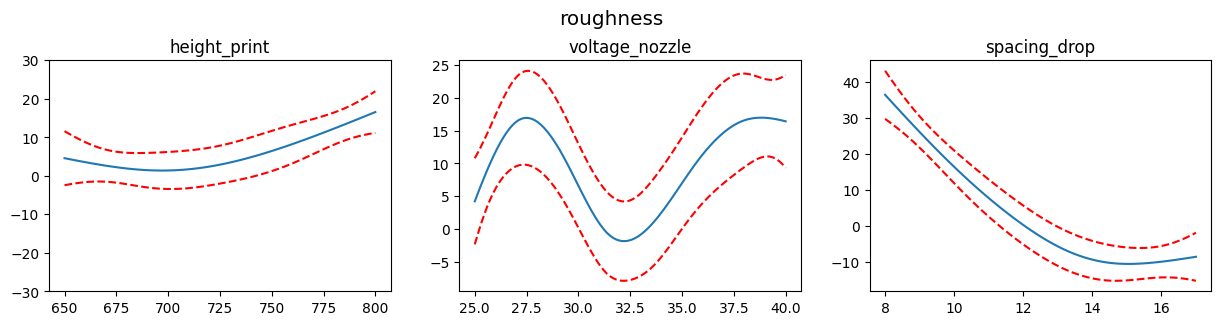

In [82]:
target_to_analyze = 'roughness'

lams = np.random.rand(len(df_features), 3)
lams = lams * 3
lams = np.exp(lams)
gam = LinearGAM(n_splines=10).gridsearch(df_features[columns_features].values, df_features[target_to_analyze].values, lam=lams)


titles = columns_features#redwine.columns[0:11]
plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))
st = fig.suptitle(target_to_analyze, fontsize='x-large')

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])
    
st.set_y(1.05)
plt.show()

### sklearn :: mlp

In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler#MinMaxScaler#StandardScaler
from sklearn.neural_network import MLPRegressor

In [129]:
target_to_analyze = 'width_line'

est = make_pipeline(
    StandardScaler(),
    MLPRegressor(
        hidden_layer_sizes=( 70, 30),
        learning_rate_init=0.01,
        solver='adam',
        early_stopping=False,
        random_state=r_seed,
    ),
)
est.fit(df_features[columns_features], df_features[target_to_analyze])

print(f"Test R2 score: {est.score(df_features[columns_features], df_features[target_to_analyze]):.2f}")

Test R2 score: 0.67


<Figure size 640x480 with 0 Axes>

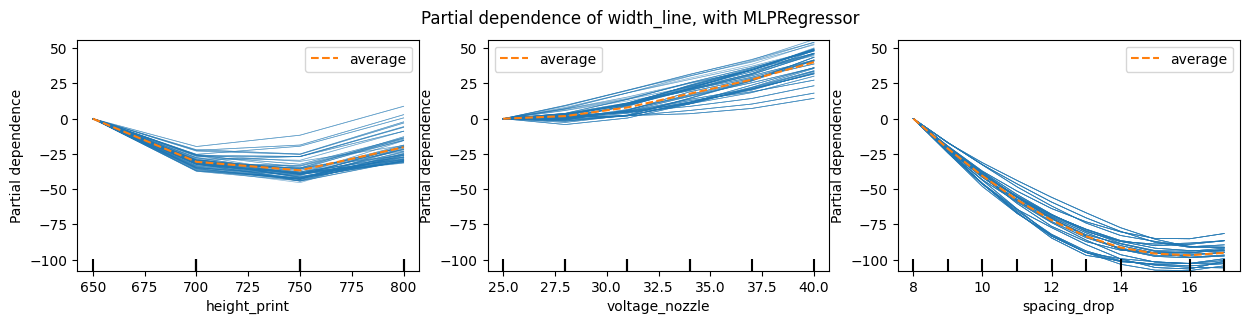

In [142]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 200,
    "n_jobs": 2,
    "grid_resolution": 40,
    "centered": True,
    "random_state": r_seed,
}

plt.figure()
fig, axs = plt.subplots(1,3,figsize=(15, 3))

display = PartialDependenceDisplay.from_estimator(
    est,
    df_features[columns_features],
    features=columns_features,
    kind="both",
    **common_params,ax = axs
)

display.figure_.suptitle(f'Partial dependence of {target_to_analyze}, with MLPRegressor')
display.figure_.subplots_adjust(hspace=0.3)

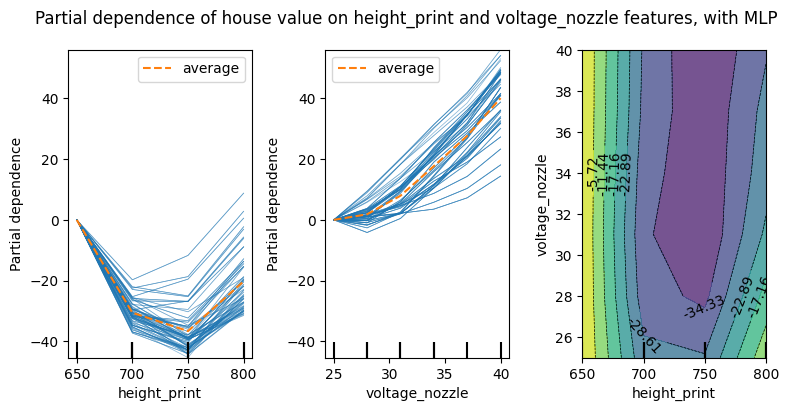

In [146]:
_, ax = plt.subplots(ncols=3, figsize=(9, 4))

# Note that we could have called the method `from_estimator` three times and
# provide one feature, one kind of plot, and one axis for each call.
display = PartialDependenceDisplay.from_estimator(
    est,
    df_features[columns_features],
    features=["height_print", "voltage_nozzle", ("height_print", "voltage_nozzle")],
    kind=["both", "both", "average"],
    ax=ax,
    **common_params,
)

display.figure_.suptitle(
    f"Partial dependence of house value on height_print and voltage_nozzle features, with MLP"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)


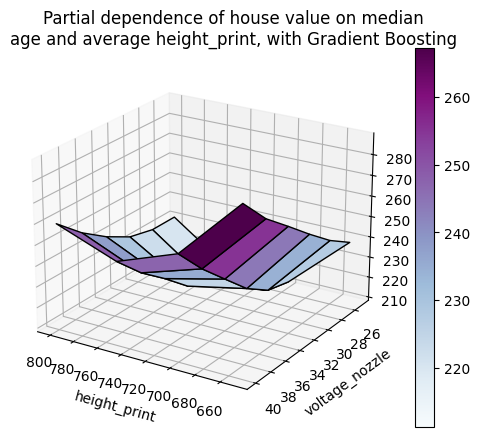

In [148]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.inspection import partial_dependence

fig = plt.figure()

features = ("height_print", "voltage_nozzle")
pdp = partial_dependence(
    est, df_features[columns_features], features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel("Partial dependence")
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle(
    "Partial dependence of house value on median\n"
    "age and average height_print, with Gradient Boosting"
)
plt.subplots_adjust(top=0.9)
plt.show()


### SHAP

  0%|          | 0/37 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

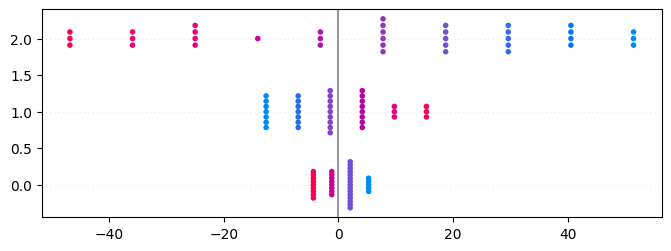

In [294]:
from sklearn import linear_model
import shap

lin_regr = linear_model.LinearRegression()
lin_regr.fit(x_train_normalized.values, y_train['width_line'].values)

## Explaining all the instances
x_train_normalized_summary = shap.kmeans(x_train_normalized, 10)
ex = shap.KernelExplainer(lin_regr.predict, x_train_normalized_summary)

shap_values = ex.shap_values(x_test_normalized)
shap.summary_plot(shap_values, x_test_normalized, show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

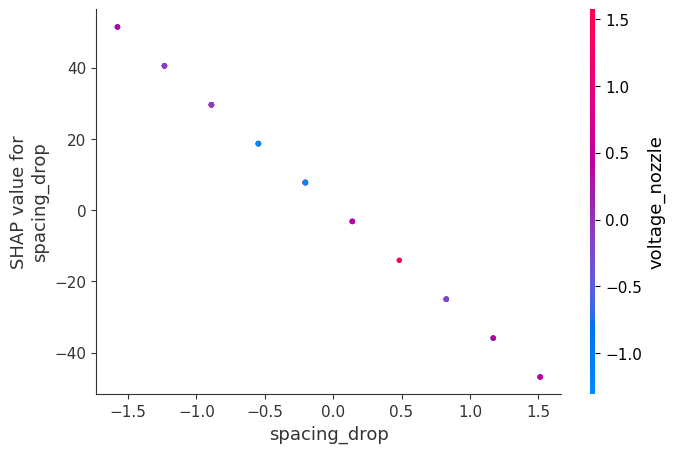

In [303]:
shap.dependence_plot("spacing_drop", shap_values, x_test_normalized)

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2

In [305]:
!/home/computeruser/anaconda3/envs/atomic/bin/pip install lazypredict

  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-1.0.5.tar.gz (5.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... |^C
anceled
ERROR: Operation cancelled by user


In [289]:
import matplotlib
matplotlib.__version__

'3.6.0'

In [25]:
pd.DataFrame([{'ml_algo':1, 'train_acc':2}, {'ml_algo': 100, 'train_acc':200}])

,ml_algo,train_acc
0,1,2
1,100,200


In [44]:
!/home/computeruser/anaconda3/envs/atomic/bin/pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires joblib==1.0.0, but you have joblib 1.2.0 which is incompatible.
lazypredict 0.2.9 requires PyYAML==5.4, but you have pyyaml 6.0 which is incompatible.
lazypredict 0.2.9 requires six==1.15.0, but you have six 1.16.0 which is incompatible.


In [49]:
# check version number
#Smooth
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(Print_Database[['Print Height','Nozzle Voltage','Drop Spacing']].add_suffixvalues, Print_Database['Overspray'])

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [115]:
    """
    43  1stFlrSF       1460 non-null   int64  
 44  2ndFlrSF       1460 non-null   int64  
 45  LowQualFinSF   1460 non-null   int64  
 46  GrLivArea      1460 non-null   int64  
 47  BsmtFullBath   1460 non-null   int64  
 48  BsmtHalfBath   1460 non-null   int64  
 49  FullBath       1460 non-null   int64  
 50  HalfBath       1460 non-null   int64  
 51  BedroomAbvGr   1460 non-null   int64  
 52  KitchenAbvGr   1460 non-null   int64  
    1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr
    """
clms = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']
## load data
housing = pd.read_csv(
    ## http://jse.amstat.org/v19n3/decock.pdf
    "https://raw.githubusercontent.com/paobranco/ImbalancedLearningRegression/master/data/housing.csv"
)

## conduct Random Over-sampling
housing_ro = smogn.smoter(
    data = housing.iloc[:, 50:53], 
    y = "BedroomAbvGr"
)

## conduct Introduction of Gaussian Noise
# housing_gn = iblr.gn(
#     data = housing, 
#     y = "SalePrice"
# )

/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
r_index: 100%|##########| 3/3 [00:00<00:00, 1104.54it/s]
/home/computeruser/anaconda3/envs/atomic/lib/python3.9/site-packages/smogn/smoter.py:284: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_new.iloc[:, j] = data_new.iloc[:, j].astype(feat_dtypes_orig[j])


In [126]:
list_opt_features

['line_width', 'roughness', 'overspray']